In [1]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.38.0 to work with workspacesession15v2


In [2]:
from azureml.core import Experiment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

In [3]:
# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace=ws, name="session15Experiment_v3")

In [4]:
# Start logging data from the experiment, obtaining a reference to the experiment run
run = experiment.start_logging()
print("Starting experiment:", experiment.name)


Starting experiment: session15Experiment_v3


In [5]:
# load the data from a local file
data = pd.read_csv('https://raw.githubusercontent.com/MicrosoftLearning/mslearn-dp100/main/data/diabetes.csv')

In [6]:
# Count the rows and log the result
row_count = (len(data))
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))


Analyzing 10000 rows of data


In [7]:
data.sample(5)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
8342,1880828,6,99,61,10,146,46.777734,0.134130,26,0
3371,1428695,1,147,82,35,49,19.700270,0.167386,31,0
535,1536771,9,52,55,9,150,42.029562,0.195996,23,0
1600,1992954,2,118,55,10,196,30.732624,0.713994,23,1
9711,1435647,3,98,63,14,40,24.805045,0.171400,21,1


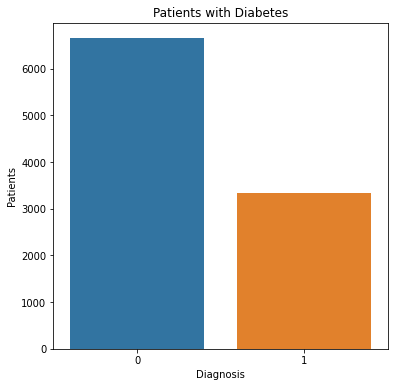

In [8]:
# Plot and log the count of diabetic vs non-diabetic patients
diabetic_counts = data['Diabetic'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
ax = sns.countplot(x="Diabetic", data=data)
ax.set_title('Patients with Diabetes') 
ax.set_xlabel('Diagnosis') 
ax.set_ylabel('Patients')
plt.show()
run.log_image(name='label distribution', plot=fig)

In [9]:
# log distinct pregnancy counts
pregnancies = data.Pregnancies.unique()
run.log_list('pregnancy categories', pregnancies)

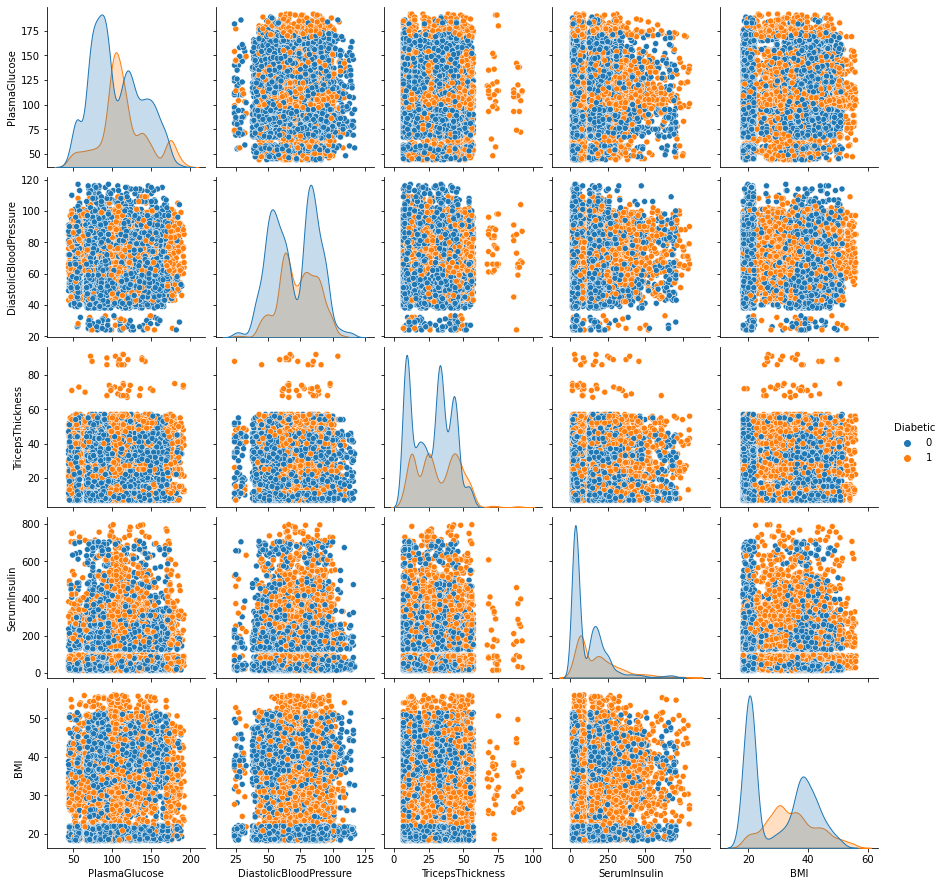

In [10]:
med_columns = ['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI','Diabetic']
fig2=sns.pairplot(data[med_columns], hue="Diabetic")

In [13]:
run.log_image(name='point-plot', plot=fig2)


In [14]:
# Save a sample of the data and upload it to the experiment output
data.sample(100).to_csv('sample.csv', index=False, header=True)
run.upload_file(name='outputs/sample2.csv', path_or_stream='./sample.csv')

In [15]:
# Complete the experiment
run.complete()

In [16]:
from azureml.widgets import RunDetails

RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

Exception in thread Thread-98:
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py38/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/azureml_py38/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda/envs/azureml_py38/lib/python3.8/multiprocessing/pool.py", line 592, in _handle_results
    cache[job]._set(i, obj)
  File "/anaconda/envs/azureml_py38/lib/python3.8/multiprocessing/pool.py", line 773, in _set
    self._callback(self._value)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/widgets/_userrun/_run_details.py", line 559, in _update_metrics
    self.widget_instance.run_metrics = result
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/traitlets/traitlets.py", line 606, in __set__
    self.set(obj, value)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/traitlets/traitlets.py", line 2651, in set
    return su